# Imports

In [1]:
import ctypes
import matplotlib.pyplot as plt
import numpy as np
import sys
import math

sys.path.append('../Lib/PythonML')
from linear import Linear
from multicouche import MLP
from svm import SVM
from rbf import RBF


In [2]:
#my_dll_path = "../mllib_rust.dll"
my_dll_path = "../Lib/SupervisingML/target/debug/libmllib_rust.so"
save_model_path = "../App/interfacev2/Models/"

Utils Functions 

In [3]:
def get_output(listy, positive_value, negative_value):
    result = []
    for y in listy:
        if y == positive_value:
            result.append(1)
        elif y == negative_value:
            result.append(-1)
    return result

def max_indice(values):
    max_value = values[0]
    max_ind = 0
    for i in range(1, len(values)):
        if values[i] > max_value:
            max_ind = i
            max_value = values[i]
    return max_ind

def get_prediction_classification_echantillon(model, min_value, max_value):
    test_points = np.array([[i, j] for i in range(50) for j in range(50)], dtype='float64') / 50.0 * (max_value - min_value) + min_value
    negative_points = []
    positive_points = []
    for k, test_input_k in enumerate(test_points):
        predicted_value = model.predict_linear_model_classification(test_input_k)
        if predicted_value == 1.0:
            positive_points.append(test_input_k)
        else:
            negative_points.append(test_input_k)
            
    return (np.array(positive_points), np.array(negative_points))

def echantillon_prediction_classification_mlp(model, min_value, max_value):
    test_points = np.array([[i, j] for i in range(50) for j in range(50)], dtype='float64') / 50.0 * (max_value - min_value) + min_value
    negative_points = []
    positive_points = []
    for k, test_input_k in enumerate(test_points):
        predicted_value = model.predict_multicouche_model_classification(test_input_k)[0]
        if predicted_value > 0.0:
            positive_points.append(test_input_k)
        else:
            negative_points.append(test_input_k)

    return (np.array(positive_points), np.array(negative_points))

def echantillon_prediction_svm(model, min_value, max_value):
    test_points = np.array([[i, j] for i in range(50) for j in range(50)], dtype='float64') / 50.0 * (max_value - min_value) + min_value
    negative_points = []
    positive_points = []
    for k, test_input_k in enumerate(test_points):
        predicted_value = model.predict_svm_model(test_input_k)
        if predicted_value > 0.0:
            positive_points.append(test_input_k)
        else:
            negative_points.append(test_input_k)

    return (np.array(positive_points), np.array(negative_points))

def echantillon_prediction_rbf(model, min_value, max_value):
    test_points = np.array([[i, j] for i in range(50) for j in range(50)], dtype='float64') / 50.0 * (max_value - min_value) + min_value
    negative_points = []
    positive_points = []
    for k, test_input_k in enumerate(test_points):
        predicted_value = model.predict_rbf_model(test_input_k)
        if predicted_value > 0.0:
            positive_points.append(test_input_k)
        else:
            negative_points.append(test_input_k)

    return (np.array(positive_points), np.array(negative_points))

def outputs_prediction_classification_mlp(model, min_value, max_value, nb_output):
    test_points = np.array([[i, j] for i in range(50) for j in range(50)], dtype='float64') / 50.0 * (max_value - min_value) + min_value
    result = []
    for test_input_k in test_points:
        predicted_value = model.predict_multicouche_model_classification(test_input_k)
        result.append([predicted_value[i] for i in range(nb_output)])
    return result
    

# Cas de tests, rendu 3

## Classification

### Linear Simple :
        Linear Model : OK
        MLP (2, 1)   : OK

In [4]:
X = np.array([
      [1, 1],
      [2, 3],
      [3, 3]
], dtype='float64')
Y = np.array([
      1,
      -1,
      -1
], dtype='float64')
flattened_X = X.flatten()

## Linear

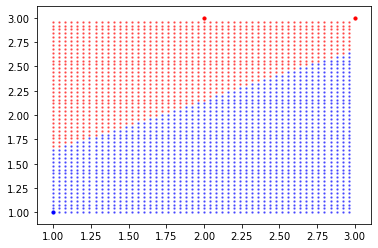

<Figure size 432x288 with 0 Axes>

In [7]:
linearMod = Linear(my_dll_path)
linearMod.init_linear_model(int(X.shape[1]))
linearMod.train_linear_model_classification(flattened_X, Y, X.shape[0], 10000, 0.05)

linearMod.save_model(save_model_path + "linear.txt")
linearMod.load_model(save_model_path + "linear.txt")

blue_points, red_points = get_prediction_classification_echantillon(linearMod, 1.0, 3.0)

if len(red_points) > 0:
    plt.scatter(red_points[:, 0], red_points[:, 1], color='red', alpha=0.5, s=2)
if len(blue_points) > 0:
    plt.scatter(blue_points[:, 0], blue_points[:, 1], color='blue', alpha=0.5, s=2)
    
plt.scatter(X[0, 0], X[0, 1], color='blue', s=10)
plt.scatter(X[1:3, 0], X[1:3, 1], color='red', s=10)
plt.show()
plt.clf()

## MLP

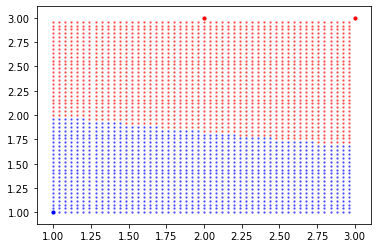

<Figure size 432x288 with 0 Axes>

In [9]:
mlpMod = MLP(my_dll_path)
mlpMod.init_multicouche_model(np.array([2,1], dtype='float64'))
mlpMod.activation_function = mlpMod.ActivationFunction.Relu
mlpMod.output_function = mlpMod.ActivationFunction.Tanh

mlpMod.train_multicouche_model_classification(flattened_X, Y, X.shape[0], 1000.0, 0.1)

mlpMod.save_model(save_model_path + "mlp.txt")
mlpMod.load_model(save_model_path + "mlp.txt")

blue_points, red_points = echantillon_prediction_classification_mlp(mlpMod, 1.0, 3.0)

if len(red_points) > 0:
    plt.scatter(red_points[:, 0], red_points[:, 1], color='red', alpha=0.5, s=2)
if len(blue_points) > 0:
    plt.scatter(blue_points[:, 0], blue_points[:, 1], color='blue', alpha=0.5, s=2)
    
plt.scatter(X[0, 0], X[0, 1], color='blue', s=10)
plt.scatter(X[1:3, 0], X[1:3, 1], color='red', s=10)
plt.show()
plt.clf()

## SVM

Kernel.BASIC


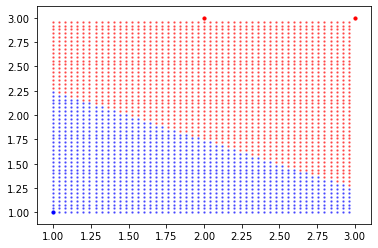



Kernel.RBF


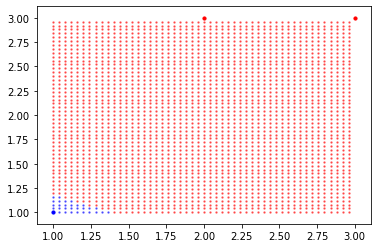



Kernel.POLYNOMIAL


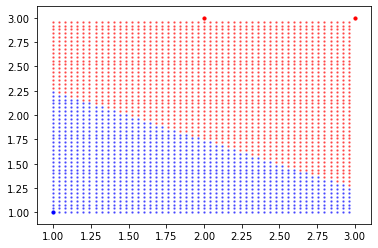

<Figure size 432x288 with 0 Axes>

In [5]:
kernels = [SVM.Kernel.BASIC, SVM.Kernel.RBF, SVM.Kernel.POLYNOMIAL]
values = [0,0.1,1]
for i in range(len(kernels)):
    print(kernels[i])
    svmMod = SVM(my_dll_path)
    P = svmMod.kernel_build(kernels[i], X, Y, [values[i]])
    svmMod.train_svm_model(P, X, Y)

    svmMod.save_model(save_model_path + "svm.txt")
    svmMod.load_model(save_model_path + "svm.txt")

    blue_points, red_points = echantillon_prediction_svm(svmMod, 1.0, 3.0)

    if len(red_points) > 0:
        plt.scatter(red_points[:, 0], red_points[:, 1], color='red', alpha=0.5, s=2)
    if len(blue_points) > 0:
        plt.scatter(blue_points[:, 0], blue_points[:, 1], color='blue', alpha=0.5, s=2)

    plt.scatter(X[0, 0], X[0, 1], color='blue', s=10)
    plt.scatter(X[1:3, 0], X[1:3, 1], color='red', s=10)
    plt.show()
    plt.clf()
    print("\n")

## RBF

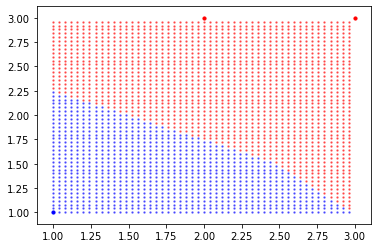

<Figure size 432x288 with 0 Axes>

In [5]:
rbfMod = RBF(my_dll_path)
rbfMod.train_rbf_model(X, Y, 10.0)

blue_points, red_points = echantillon_prediction_rbf(rbfMod, 1.0, 3.0)

if len(red_points) > 0:
    plt.scatter(red_points[:, 0], red_points[:, 1], color='red', alpha=0.5, s=2)
if len(blue_points) > 0:
    plt.scatter(blue_points[:, 0], blue_points[:, 1], color='blue', alpha=0.5, s=2)
    
plt.scatter(X[0, 0], X[0, 1], color='blue', s=10)
plt.scatter(X[1:3, 0], X[1:3, 1], color='red', s=10)
plt.show()
plt.clf()

### Linear Multiple :
        Linear Model : OK
        MLP (2, 1)   : OK

In [6]:
X = np.concatenate([np.random.random((50,2)) * 0.9 + np.array([1, 1]), np.random.random((50,2)) * 0.9 + np.array([2, 2])])
Y = np.concatenate([np.ones((25, 2)), np.ones((25, 2)) * -1.0])

## Linear

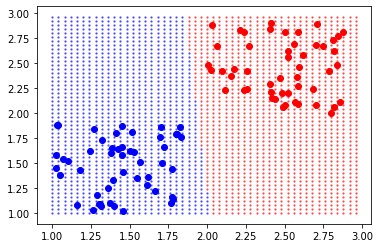

<Figure size 432x288 with 0 Axes>

In [5]:
linearMod = Linear(my_dll_path)
linearMod.init_linear_model(2)
flattened_X = X.flatten()

linearMod.train_linear_model_classification(flattened_X, Y, X.shape[0], 1000, 0.1)
blue_points, red_points = get_prediction_classification_echantillon(linearMod, 1.0, 3.0)

if len(red_points) > 0:
    plt.scatter(red_points[:, 0], red_points[:, 1], color='red', alpha=0.5, s=2)
if len(blue_points) > 0:
    plt.scatter(blue_points[:, 0], blue_points[:, 1], color='blue', alpha=0.5, s=2)
    
plt.scatter(X[0:50, 0], X[0:50, 1], color='blue')
plt.scatter(X[50:100,0], X[50:100,1], color='red')
plt.show()
plt.clf()

## MLP

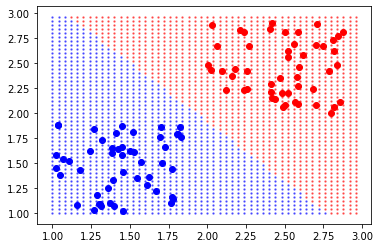

<Figure size 432x288 with 0 Axes>

In [6]:
mlpMod = MLP(my_dll_path)
mlpMod.init_multicouche_model(np.array([2,1], dtype='float64'))
flattened_X = X.flatten()
mlpMod.train_multicouche_model_classification(flattened_X, Y, X.shape[0], 4000.0, 0.05)

blue_points, red_points = echantillon_prediction_classification_mlp(mlpMod, 1.0, 3.0)

if len(red_points) > 0:
    plt.scatter(red_points[:, 0], red_points[:, 1], color='red', alpha=0.5, s=2)
if len(blue_points) > 0:
    plt.scatter(blue_points[:, 0], blue_points[:, 1], color='blue', alpha=0.5, s=2)
    
plt.scatter(X[0:50, 0], X[0:50, 1], color='blue')
plt.scatter(X[50:100,0], X[50:100,1], color='red')
plt.show()
plt.clf()

## SVM

(100, 2)
{'x': <100x1 matrix, tc='d'>, 'y': <1x1 matrix, tc='d'>, 's': <100x1 matrix, tc='d'>, 'z': <100x1 matrix, tc='d'>, 'status': 'unknown', 'gap': 31301.55549299963, 'relative gap': 2.078801393490871e-06, 'primal objective': -15057501688.718725, 'dual objective': -15057532990.274218, 'primal infeasibility': 4.76837158203125e-07, 'dual infeasibility': 1.0000031293171234, 'primal slack': 56428935.22957429, 'dual slack': 7.353006992507995e-09, 'iterations': 5}
10000
Kernel.BASIC


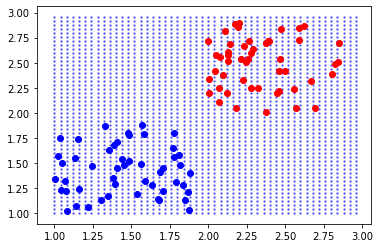



Kernel.RBF


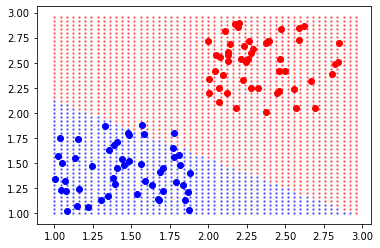



Kernel.POLYNOMIAL


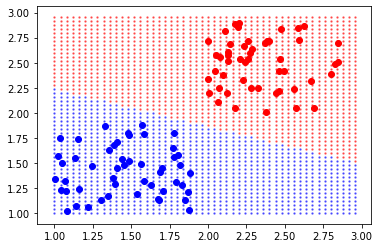

<Figure size 432x288 with 0 Axes>

In [11]:
kernels = [SVM.Kernel.BASIC, SVM.Kernel.RBF, SVM.Kernel.POLYNOMIAL]
values = [0,0.01,1]
svmMod = SVM(my_dll_path)
P = svmMod.basic_kernel_build(X, Y)
operation = svmMod.qp_solver(P, X, Y)
print(X.shape)
print(operation)
print(len(P))
for i in range(len(kernels)):
    print(kernels[i])
    svmMod = SVM(my_dll_path)
    P = svmMod.kernel_build(kernels[i], X, Y, [values[i]])
    svmMod.train_svm_model(P, X, Y)

    blue_points, red_points = echantillon_prediction_svm(svmMod, 1.0, 3.0)

    if len(red_points) > 0:
        plt.scatter(red_points[:, 0], red_points[:, 1], color='red', alpha=0.5, s=2)
    if len(blue_points) > 0:
        plt.scatter(blue_points[:, 0], blue_points[:, 1], color='blue', alpha=0.5, s=2)

    plt.scatter(X[0:50, 0], X[0:50, 1], color='blue')
    plt.scatter(X[50:100,0], X[50:100,1], color='red')
    plt.show()
    plt.clf()
    print("\n")

## RBF

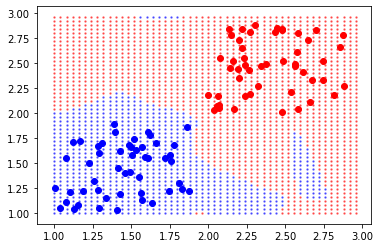

<Figure size 432x288 with 0 Axes>

In [9]:
rbfMod = RBF(my_dll_path)
rbfMod.train_rbf_model(X, Y, 10.0)

blue_points, red_points = echantillon_prediction_rbf(rbfMod, 1.0, 3.0)

if len(red_points) > 0:
    plt.scatter(red_points[:, 0], red_points[:, 1], color='red', alpha=0.5, s=2)
if len(blue_points) > 0:
    plt.scatter(blue_points[:, 0], blue_points[:, 1], color='blue', alpha=0.5, s=2)
    
plt.scatter(X[0:50, 0], X[0:50, 1], color='blue')
plt.scatter(X[50:100,0], X[50:100,1], color='red')
plt.show()
plt.clf()

### XOR :
        Linear Model    : KO
        MLP (2, 2, 1)   : OK

In [11]:
X = np.array([[1, 0], [0, 1], [0, 0], [1, 1]], dtype='float64')
Y = np.array([1, 1, -1, -1], dtype='float64')

## Linear

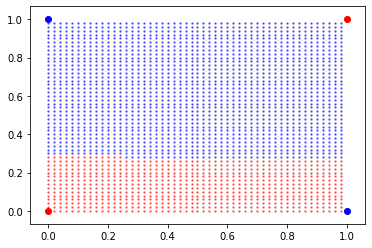

<Figure size 432x288 with 0 Axes>

In [5]:
linearMod = Linear(my_dll_path)
linearMod.init_linear_model(2)
flattened_X = X.flatten()
linearMod.train_linear_model_classification(flattened_X, Y, X.shape[0], 1000, 0.1)
blue_points, red_points = get_prediction_classification_echantillon(linearMod, 0.0, 1.0)

if len(red_points) > 0:
    plt.scatter(red_points[:, 0], red_points[:, 1], color='red', alpha=0.5, s=2)
if len(blue_points) > 0:
    plt.scatter(blue_points[:, 0], blue_points[:, 1], color='blue', alpha=0.5, s=2)

plt.scatter(X[0:2, 0], X[0:2, 1], color='blue')
plt.scatter(X[2:4,0], X[2:4,1], color='red')
plt.show()
plt.clf()

## MLP

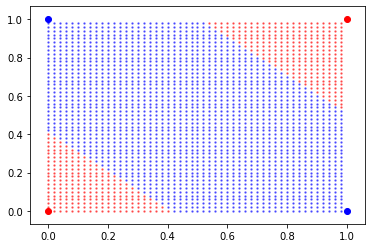

<Figure size 432x288 with 0 Axes>

In [6]:
flattened_X = X.flatten()

mlpMod = MLP(my_dll_path)
mlpMod.init_multicouche_model(np.array([2, 2, 1], dtype='float64'))
mlpMod.train_multicouche_model_classification(flattened_X, Y, X.shape[0], 20000.0, 0.05)

blue_points, red_points = echantillon_prediction_classification_mlp(mlpMod, 0.0, 1.0)

if len(red_points) > 0:
    plt.scatter(red_points[:, 0], red_points[:, 1], color='red', alpha=0.5, s=2)
if len(blue_points) > 0:
    plt.scatter(blue_points[:, 0], blue_points[:, 1], color='blue', alpha=0.5, s=2)

plt.scatter(X[0:2, 0], X[0:2, 1], color='blue')
plt.scatter(X[2:4,0], X[2:4,1], color='red')
plt.show()
plt.clf()

## SVM

Kernel.BASIC


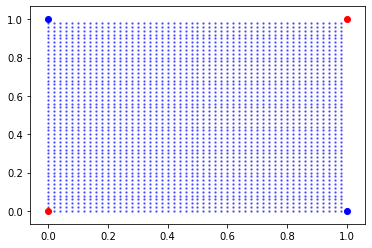



Kernel.RBF


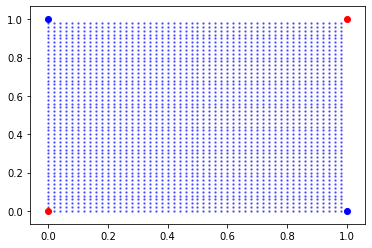



Kernel.POLYNOMIAL


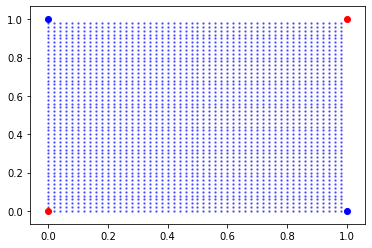

<Figure size 432x288 with 0 Axes>

In [29]:
kernels = [SVM.Kernel.BASIC, SVM.Kernel.RBF, SVM.Kernel.POLYNOMIAL]
values = [0,100.0,1]
for i in range(len(kernels)):
    print(kernels[i])
    svmMod = SVM(my_dll_path)
    P = svmMod.kernel_build(kernels[i], X, Y, [values[i]])
    svmMod.train_svm_model(P, X, Y)

    blue_points, red_points = echantillon_prediction_svm(svmMod, 0.0, 1.0)

    if len(red_points) > 0:
        plt.scatter(red_points[:, 0], red_points[:, 1], color='red', alpha=0.5, s=2)
    if len(blue_points) > 0:
        plt.scatter(blue_points[:, 0], blue_points[:, 1], color='blue', alpha=0.5, s=2)

    plt.scatter(X[0:2, 0], X[0:2, 1], color='blue')
    plt.scatter(X[2:4,0], X[2:4,1], color='red')
    plt.show()
    plt.clf()
    print("\n")




## RBF

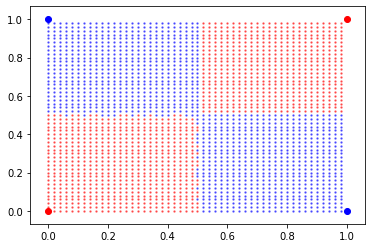

<Figure size 432x288 with 0 Axes>

In [12]:
rbfMod = RBF(my_dll_path)
rbfMod.train_rbf_model(X, Y, 10.0)

blue_points, red_points = echantillon_prediction_rbf(rbfMod, 0.0, 1.0)

if len(red_points) > 0:
    plt.scatter(red_points[:, 0], red_points[:, 1], color='red', alpha=0.5, s=2)
if len(blue_points) > 0:
    plt.scatter(blue_points[:, 0], blue_points[:, 1], color='blue', alpha=0.5, s=2)
    
plt.scatter(X[0:2, 0], X[0:2, 1], color='blue')
plt.scatter(X[2:4,0], X[2:4,1], color='red')
plt.show()
plt.clf()

### Cross :
        Linear Model    : KO
        MLP (2, 4, 1)   : OK

In [17]:
X = np.random.random((500, 2)) * 2.0 - 1.0
Y = np.array([1 if abs(p[0]) <= 0.3 or abs(p[1]) <= 0.3 else -1 for p in X], dtype='float64')

## Linear

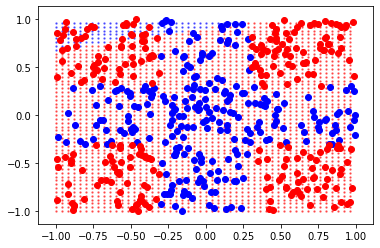

<Figure size 432x288 with 0 Axes>

In [71]:
linearMod = Linear(my_dll_path)
linearMod.init_linear_model(2)
flattened_X = X.flatten()
linearMod.train_linear_model_classification(flattened_X, Y, X.shape[0], 1000, 0.1)
blue_points, red_points = get_prediction_classification_echantillon(linearMod, -1.0, 1.0)

if len(red_points) > 0:
    plt.scatter(red_points[:, 0], red_points[:, 1], color='red', alpha=0.5, s=2)
if len(blue_points) > 0:
    plt.scatter(blue_points[:, 0], blue_points[:, 1], color='blue', alpha=0.5, s=2)


plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == -1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == -1, enumerate(X)))))[:,1], color='red')
plt.show()
plt.clf()

## MLP

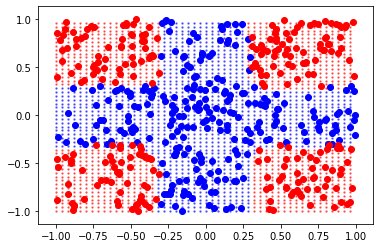

<Figure size 432x288 with 0 Axes>

In [72]:
mlpMod = MLP(my_dll_path)
mlpMod.init_multicouche_model(np.array([2, 4, 1], dtype='float64'))
mlpMod.train_multicouche_model_classification(X.flatten(), Y, X.shape[0], 50000.0, 0.05)

blue_points, red_points = echantillon_prediction_classification_mlp(mlpMod, -1.0, 1.0)

if len(red_points) > 0:
    plt.scatter(red_points[:, 0], red_points[:, 1], color='red', alpha=0.5, s=2)
if len(blue_points) > 0:
    plt.scatter(blue_points[:, 0], blue_points[:, 1], color='blue', alpha=0.5, s=2)


plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == -1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == -1, enumerate(X)))))[:,1], color='red')
plt.show()
plt.clf()


## RBF

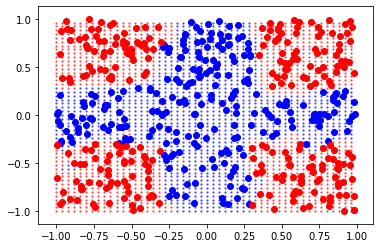

<Figure size 432x288 with 0 Axes>

In [19]:
rbfMod = RBF(my_dll_path)
rbfMod.train_rbf_model(X, Y, 100.0)

blue_points, red_points = echantillon_prediction_rbf(rbfMod, -1.0, 1.0)

if len(red_points) > 0:
    plt.scatter(red_points[:, 0], red_points[:, 1], color='red', alpha=0.5, s=2)
if len(blue_points) > 0:
    plt.scatter(blue_points[:, 0], blue_points[:, 1], color='blue', alpha=0.5, s=2)
    
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == -1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == -1, enumerate(X)))))[:,1], color='red')
plt.show()
plt.clf()

### Multi Linear 3 classes :
        Linear Model x3 : OK
        MLP (2, 3)      : OK

In [21]:
X = np.random.random((500, 2)) * 2.0 - 1.0
Y = np.array([[1, 0, 0] if -p[0] - p[1] - 0.5 > 0 and p[1] < 0 and p[0] - p[1] - 0.5 < 0 else 
              [0, 1, 0] if -p[0] - p[1] - 0.5 < 0 and p[1] > 0 and p[0] - p[1] - 0.5 < 0 else 
              [0, 0, 1] if -p[0] - p[1] - 0.5 < 0 and p[1] < 0 and p[0] - p[1] - 0.5 > 0 else 
              [0, 0, 0]for p in X])

## Linear

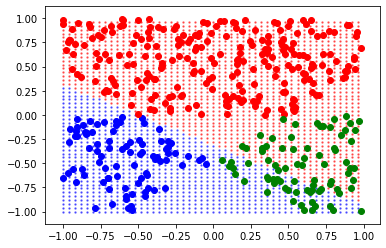

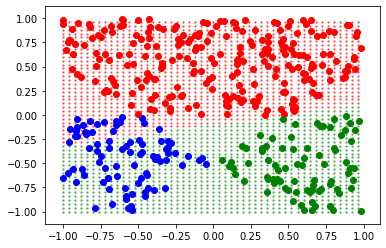

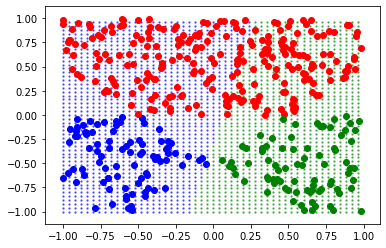

<Figure size 432x288 with 0 Axes>

In [25]:
comparaisons = [
    [[1,0,0], [0,1,0]],
    [[0,0,1], [0,1,0]],
    [[1,0,0], [0,0,1]]
]

colors = [
    ['red', 'blue'],
    ['red', 'green'],
    ['green', 'blue']
]

for i in range(len(comparaisons)):
    comparaison = comparaisons[i]
    input_x = np.array([X[i] for (i,y) in enumerate(Y.tolist()) if y in comparaison], dtype='float64')
    output_y = np.array(get_output(Y.tolist(), comparaison[0], comparaison[1]), dtype='float64')
    flattened_input = input_x.flatten()
   
    model = Linear(my_dll_path)
    model.init_linear_model(2)
    model.train_linear_model_classification(flattened_input, output_y, output_y.shape[0], 10000, 0.1)
    blue_points, red_points = get_prediction_classification_echantillon(model, -1.0, 1.0)
    
    if len(red_points) > 0:
        plt.scatter(red_points[:, 0], red_points[:, 1], color=colors[i][0], alpha=0.5, s=2)
    if len(blue_points) > 0:
        plt.scatter(blue_points[:, 0], blue_points[:, 1], color=colors[i][1], alpha=0.5, s=2)

    plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,1], color='blue')
    plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,1], color='red')
    plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,1], color='green')
    plt.show()
    plt.clf()

## MLP

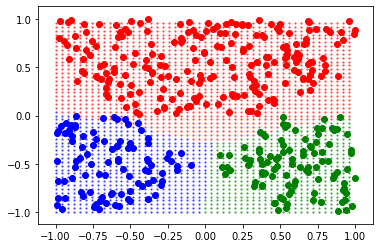

<Figure size 432x288 with 0 Axes>

In [78]:
mlpMod = MLP(my_dll_path)
mlpMod.init_multicouche_model(np.array([2, 3], dtype='float64'))
mlpMod.train_multicouche_model_classification(np.array(X.flatten(), dtype='float64'), np.array(Y.flatten(), dtype='float64'), X.shape[0], 50000.0, 0.02)

blue_points = []
red_points = []
green_points = []
test_points = np.array([[i, j] for i in range(50) for j in range(50)], dtype='float64') / 50.0 * 2.0 - 1.0
for j,point in enumerate(test_points):
    predicted_value = mlpMod.predict_multicouche_model_classification(point)
    predicted_list = [predicted_value[i] for i in range(3)]
    #print(predicted_list)
    max_ind = max_indice(predicted_list)
    
    if max_ind == 0:
        blue_points.append(point) 
    elif max_ind == 1:
        red_points.append(point) 
    elif max_ind == 2:
        green_points.append(point) 

blue_points = np.array(blue_points)
red_points = np.array(red_points)
green_points = np.array(green_points)

if len(red_points) > 0:
    plt.scatter(red_points[:, 0], red_points[:, 1], color='red', alpha=0.5, s=2)
if len(blue_points) > 0:
    plt.scatter(blue_points[:, 0], blue_points[:, 1], color='blue', alpha=0.5, s=2)
if len(green_points) > 0:
    plt.scatter(green_points[:, 0], green_points[:, 1], color='green', alpha=0.5, s=2)


plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,1], color='red')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,1], color='green')
plt.show()
plt.clf()

## RBF

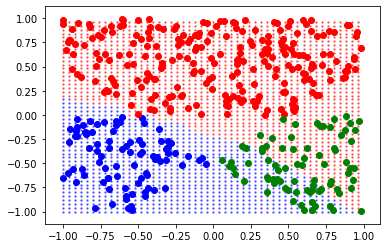

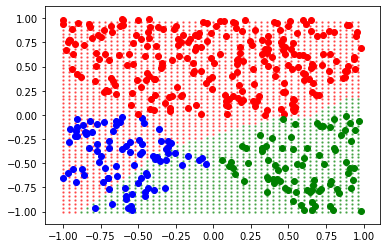

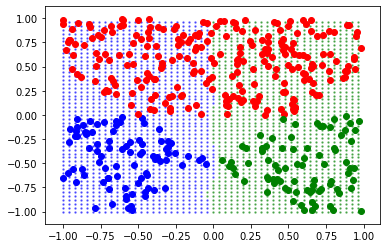

<Figure size 432x288 with 0 Axes>

In [24]:
comparaisons = [
    [[1,0,0], [0,1,0]],
    [[0,0,1], [0,1,0]],
    [[1,0,0], [0,0,1]]
]
colors = [
    ['red', 'blue'],
    ['red', 'green'],
    ['green', 'blue']
]
for i in range(len(comparaisons)):
    comparaison = comparaisons[i]
    input_x = np.array([X[i] for (i,y) in enumerate(Y.tolist()) if y in comparaison], dtype='float64')
    output_y = np.array(get_output(Y.tolist(), comparaison[0], comparaison[1]), dtype='float64')
    flattened_input = input_x.flatten()
   
    rbfMod = RBF(my_dll_path)
    rbfMod.train_rbf_model(input_x, output_y, 100.0)

    blue_points, red_points = echantillon_prediction_rbf(rbfMod, -1.0, 1.0)

    if len(red_points) > 0:
        plt.scatter(red_points[:, 0], red_points[:, 1], color=colors[i][0], alpha=0.5, s=2)
    if len(blue_points) > 0:
        plt.scatter(blue_points[:, 0], blue_points[:, 1], color=colors[i][1], alpha=0.5, s=2)

    plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,1], color='blue')
    plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,1], color='red')
    plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,1], color='green')
    plt.show()
    plt.clf()

## SVM

### Multi Cross :
        Linear Model x3 : KO
        MLP (2, ?, ?, 3): OK

In [27]:
X = np.random.random((1000, 2)) * 2.0 - 1.0
Y = np.array([[1, 0, 0] if abs(p[0] % 0.5) <= 0.25 and abs(p[1] % 0.5) > 0.25 else [0, 1, 0] if abs(p[0] % 0.5) > 0.25 and abs(p[1] % 0.5) <= 0.25 else [0, 0, 1] for p in X])

## Linear

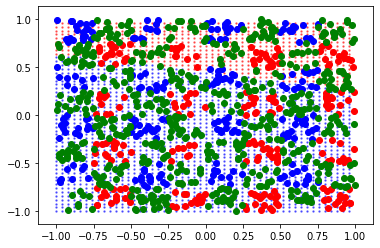

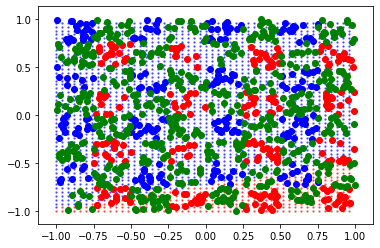

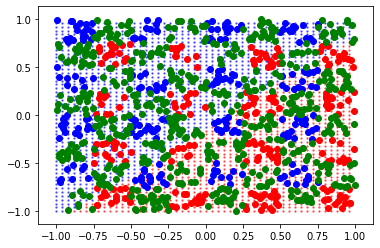

<Figure size 432x288 with 0 Axes>

In [49]:
comparaisons = [
    [[1,0,0], [0,1,0]],
    [[0,0,1], [0,1,0]],
    [[1,0,0], [0,0,1]]
]

for comparaison in comparaisons:
    input_x = np.array([X[i] for (i,y) in enumerate(Y.tolist()) if y in comparaison], dtype='float64')
    output_y = np.array(get_output(Y.tolist(), comparaison[0], comparaison[1]), dtype='float64')
    flattened_input = input_x.flatten()

    model = Linear(my_dll_path)
    model.init_linear_model(2)
    model.train_linear_model_classification(flattened_input, output_y, output_y.shape[0], 10000, 0.1)
    blue_points, red_points = get_prediction_classification_echantillon(model, -1.0, 1.0)
    
    if len(red_points) > 0:
        plt.scatter(red_points[:, 0], red_points[:, 1], color='red', alpha=0.5, s=2)
    if len(blue_points) > 0:
        plt.scatter(blue_points[:, 0], blue_points[:, 1], color='blue', alpha=0.5, s=2)

    plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,1], color='blue')
    plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,1], color='red')
    plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,1], color='green')
    plt.show()
    plt.clf()

## MLP

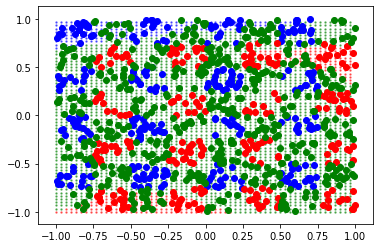

0.51% de bonnes réponses


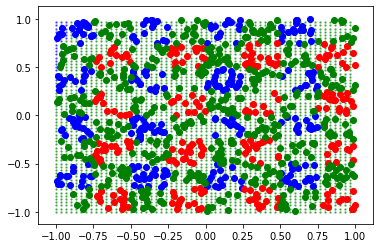

0.51% de bonnes réponses
0.51% de moyenne


<Figure size 432x288 with 0 Axes>

In [29]:
# carré de 8 groupes sur 8 groupes (64 groupes) sur 2 en abscisse -> 1 groupe = 0,25
# 2, 16, 4, 3 / iteration : 200000 / alpha : 0.02 -> 0,52 de moyenne (pas que du vert)
# 2, 8, 8, 3 / iteration : 200000 / alpha : 0.02 -> 0,49 de moyenne 
iteration = 200000.0
alpha = 0.02
layers = [2, 8, 8, 3]

def error_percent(precision, iterations = 1):
    sum_response = 0
    for _ in range(iterations):
        model = MLP(my_dll_path)
        model.init_multicouche_model(np.array(layers, dtype='float64'))
        mlpMod.activation_function = mlpMod.ActivationFunction.Relu
        mlpMod.output_function = mlpMod.ActivationFunction.Tanh
        model.train_multicouche_model_classification(np.array(X.flatten(), dtype='float64'), np.array(Y.flatten(), dtype='float64'), X.shape[0], iteration, alpha)
        test_points = np.array([[i, j] for i in range(precision) for j in range(precision)], dtype='float64') / precision * 2.0 - 1.0

        blue_points = []
        red_points = []
        green_points = []
        good_response = 0
        for j,point in enumerate(test_points):
            predicted_value = model.predict_multicouche_model_classification(point)
            predicted_list = [predicted_value[i] for i in range(3)]
            max_ind = max_indice(predicted_list)

            if abs(point[0] % 0.5) <= 0.25 and abs(point[1] % 0.5) > 0.25:
                if max_ind == 0:
                    good_response += 1
            elif abs(point[0] % 0.5) > 0.25 and abs(point[1] % 0.5) <= 0.25:
                if max_ind == 1:
                    good_response += 1
            else:
                if max_ind == 2:
                    good_response += 1
            
            if max_ind == 0:
                blue_points.append(point) 
            elif max_ind == 1:
                red_points.append(point) 
            elif max_ind == 2:
                green_points.append(point) 

                    
        blue_points = np.array(blue_points)
        red_points = np.array(red_points)
        green_points = np.array(green_points)
        if len(red_points) > 0:
            plt.scatter(red_points[:, 0], red_points[:, 1], color='red', alpha=0.5, s=2)
        if len(blue_points) > 0:
            plt.scatter(blue_points[:, 0], blue_points[:, 1], color='blue', alpha=0.5, s=2)
        if len(green_points) > 0:
            plt.scatter(green_points[:, 0], green_points[:, 1], color='green', alpha=0.5, s=2)

        plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,1], color='blue')
        plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,1], color='red')
        plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,1], color='green')
        plt.show()
        plt.clf()
        
        print("{:.2f}".format(good_response / len(test_points)) + '% de bonnes réponses')
        sum_response += good_response / len(test_points)
        
    print("{:.2f}".format(sum_response / iterations) + '% de moyenne')
    
error_percent(60, 2)

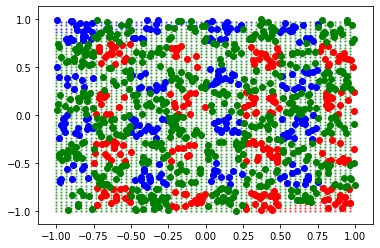

<Figure size 432x288 with 0 Axes>

In [51]:
iteration = 50000.0
alpha = 0.03
layers = [2, 16, 4, 3]

mlpMod = MLP(my_dll_path)
mlpMod.init_multicouche_model(np.array(layers, dtype='float64'))
mlpMod.train_multicouche_model_classification(np.array(X.flatten(), dtype='float64'), np.array(Y.flatten(), dtype='float64'), X.shape[0], iteration, alpha)
blue_points = []
red_points = []
green_points = []
precision = 60
test_points = np.array([[i, j] for i in range(precision) for j in range(precision)], dtype='float64') / precision * 2.0 - 1.0
for j,point in enumerate(test_points):
    predicted_value = mlpMod.predict_multicouche_model_classification(point)
    predicted_list = [predicted_value[i] for i in range(3)]
    #print(predicted_list)
    max_ind = max_indice(predicted_list)
    
    if max_ind == 0:
        blue_points.append(point) 
    elif max_ind == 1:
        red_points.append(point) 
    elif max_ind == 2:
        green_points.append(point) 

blue_points = np.array(blue_points)
red_points = np.array(red_points)
green_points = np.array(green_points)

if len(red_points) > 0:
    plt.scatter(red_points[:, 0], red_points[:, 1], color='red', alpha=0.5, s=2)
if len(blue_points) > 0:
    plt.scatter(blue_points[:, 0], blue_points[:, 1], color='blue', alpha=0.5, s=2)
if len(green_points) > 0:
    plt.scatter(green_points[:, 0], green_points[:, 1], color='green', alpha=0.5, s=2)


plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,1], color='red')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,1], color='green')
plt.show()
plt.clf()

## SVM

## RBF

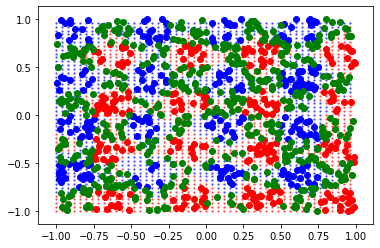

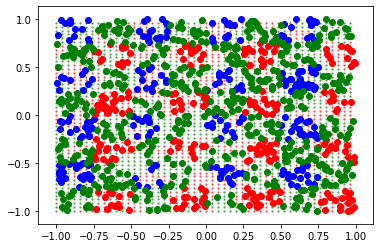

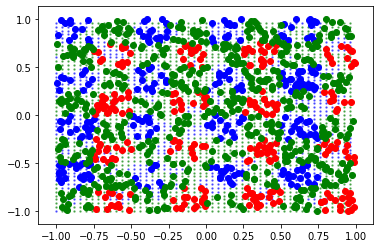

<Figure size 432x288 with 0 Axes>

In [28]:
comparaisons = [
    [[1,0,0], [0,1,0]],
    [[0,0,1], [0,1,0]],
    [[1,0,0], [0,0,1]]
]
colors = [
    ['red', 'blue'],
    ['red', 'green'],
    ['green', 'blue']
]
for i in range(len(comparaisons)):
    comparaison = comparaisons[i]
    input_x = np.array([X[i] for (i,y) in enumerate(Y.tolist()) if y in comparaison], dtype='float64')
    output_y = np.array(get_output(Y.tolist(), comparaison[0], comparaison[1]), dtype='float64')
    flattened_input = input_x.flatten()
   
    rbfMod = RBF(my_dll_path)
    rbfMod.train_rbf_model(input_x, output_y, 100.0)

    blue_points, red_points = echantillon_prediction_rbf(rbfMod, -1.0, 1.0)

    if len(red_points) > 0:
        plt.scatter(red_points[:, 0], red_points[:, 1], color=colors[i][0], alpha=0.5, s=2)
    if len(blue_points) > 0:
        plt.scatter(blue_points[:, 0], blue_points[:, 1], color=colors[i][1], alpha=0.5, s=2)

    plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,1], color='blue')
    plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,1], color='red')
    plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,1], color='green')
    plt.show()
    plt.clf()

## Régression

### Linear Simple 2D :
        Linear Model : OK
        MLP (1, 1)   : OK

In [14]:
X = np.array([
      [1],
      [2]
], dtype='float64')
newX = np.array([
      [1,1],
      [1,2]
], dtype='float64')
Y = np.array([
      2,
      3
], dtype='float64')

## Linear

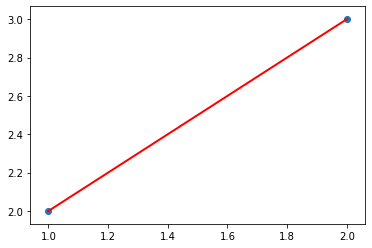

<Figure size 432x288 with 0 Axes>

In [84]:
flattened_X = newX.flatten()

model = Linear(my_dll_path)
equation = model.train_linear_model_regression(flattened_X, Y, newX.shape[0] * newX.shape[1])

# model.predict_linear_model_regression(np.array(X[1])) == X[1] * equation[0] + equation[1]

plt.plot([X[0], X[1]], [model.predict_linear_model_regression(np.array(X[0])), model.predict_linear_model_regression(np.array(X[1]))], 'r-', lw=2) # Red straight line
plt.scatter(X,Y)
plt.show()
plt.clf()

## MLP

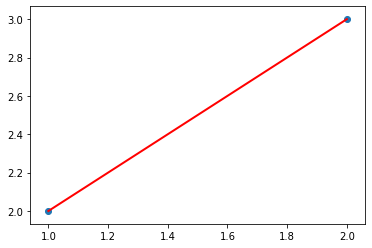

<Figure size 432x288 with 0 Axes>

In [85]:
model = MLP(my_dll_path)
model.init_multicouche_model(np.array([1.0,1.0], dtype='float64'))
model.train_multicouche_model_regression(X.flatten(), Y.flatten(), len(Y), 10000.0, 0.01)

plt.plot([X[0], X[1]], [model.predict_multicouche_model_regression(np.array(X[0]))[0], model.predict_multicouche_model_regression(np.array(X[1]))[0]], 'r-', lw=2)
plt.scatter(X,Y)
plt.show()
plt.clf()

## RBF

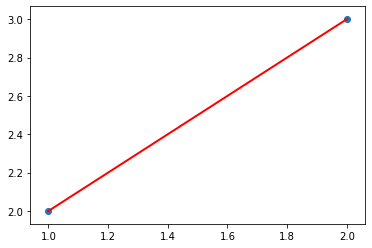

<Figure size 432x288 with 0 Axes>

In [15]:
rbfMod = RBF(my_dll_path)
rbfMod.train_rbf_model(X, Y, 1.0)

plt.plot([X[0], X[1]], [rbfMod.predict_rbf_model(np.array(X[0])), rbfMod.predict_rbf_model(np.array(X[1]))], 'r-', lw=2)
plt.scatter(X,Y)
plt.show()
plt.clf()

### Non Linear Simple 2D :
        Linear Model    : OK
        MLP (1, ?, 1)   : OK

In [29]:
X = np.array([
      [1],
      [2],
      [3]
], dtype='float64')
newX = np.array([
    [1,1],
    [1,2],
    [1,3]
],dtype='float64')
Y = np.array([
      2,
      3,
      2.5
],dtype='float64')

## Linear

[2.000000000000001, 0.25, 2.5]
[2.250000000000001, 2.500000000000001, 2.750000000000001]


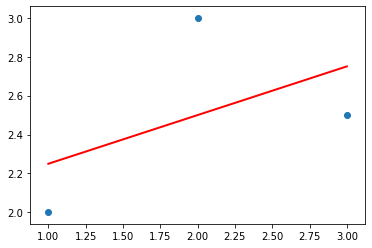

<Figure size 432x288 with 0 Axes>

In [13]:
model = Linear(my_dll_path)
equations = model.train_linear_model_regression(newX.flatten(),Y,newX.shape[0] * newX.shape[1])
print(equations)

y = []
for i in range(len(equations)):
    y.append(model.predict_linear_model_regression(np.array(X[i])))
print(y)

plt.plot([X[0], X[1], X[2]], [y[0], y[1], y[2]], 'r-', lw=2)
plt.scatter(X,Y)
plt.show()
plt.clf()

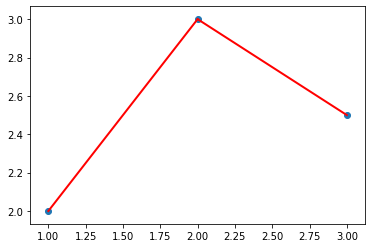

<Figure size 432x288 with 0 Axes>

In [14]:
model = Linear(my_dll_path)
model.train_linear_model_regression(newX[:2].flatten(),Y[:2],newX[:2].shape[0] * newX.shape[1])
plt.plot([X[0], X[1]], [model.predict_linear_model_regression(np.array(X[0])), model.predict_linear_model_regression(np.array(X[1]))], 'r-', lw=2)

model.train_linear_model_regression(newX[1:].flatten(),Y[1:],newX[1:].shape[0] * newX.shape[1])
plt.plot([X[1], X[2]], [model.predict_linear_model_regression(np.array(X[1])), model.predict_linear_model_regression(np.array(X[2]))], 'r-', lw=2)

plt.scatter(X,Y)
plt.show()
plt.clf()

## MLP

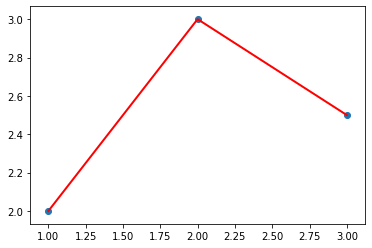

<Figure size 432x288 with 0 Axes>

In [15]:
model = MLP(my_dll_path)
model.init_multicouche_model(np.array([1,4,1], dtype='float64'))
model.train_multicouche_model_regression(X.flatten(), Y.flatten(), len(Y), 60000.0, 0.01)

plt.plot([X[0], X[1], X[2]], [model.predict_multicouche_model_regression(np.array(X[0]))[0], model.predict_multicouche_model_regression(np.array(X[1]))[0], model.predict_multicouche_model_regression(np.array(X[2]))[0]], 'r-', lw=2)
plt.scatter(X,Y)
plt.show()
plt.clf()

## RBF

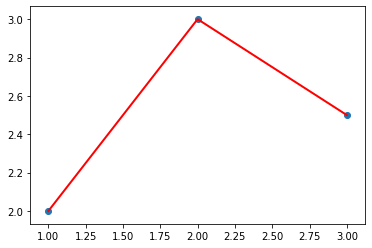

<Figure size 432x288 with 0 Axes>

In [32]:
rbfMod = RBF(my_dll_path)
rbfMod.train_rbf_model(X, Y, 1.0)

plt.plot([X[0], X[1], X[2]], 
         [rbfMod.predict_rbf_model(np.array(X[0])), 
          rbfMod.predict_rbf_model(np.array(X[1])), 
          rbfMod.predict_rbf_model(np.array(X[2]))], 'r-', lw=2)
plt.scatter(X,Y)
plt.show()
plt.clf()

### Linear Simple 3D :
        Linear Model    : OK
        MLP (2, 1)      : OK

In [33]:
X = np.array([
      [1, 1],
      [2, 2],
      [3, 1]
], dtype='float64')
Y = np.array([
      2,
      3,
      2.5
], dtype='float64')

In [35]:
from mpl_toolkits.mplot3d import Axes3D

## Linear

[0.4499999999999995, 1.149999999999999, 2.5]
4.099999999999999


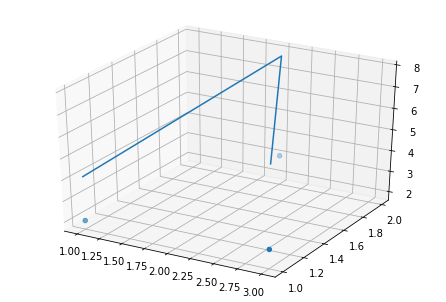

<Figure size 432x288 with 0 Axes>

In [107]:
'''
normal = np.array([1, 1, 2])
xx, yy = np.meshgrid(range(10), range(10))
z = (-normal[0] * xx - normal[1] * yy) * 1. /normal[2]
plt3d = plt.figure().gca(projection='3d')
plt3d.plot_surface(xx, yy, z, alpha=0.2)
'''

model = Linear(my_dll_path)
equation = model.train_linear_model_regression(X.flatten(), Y, X.shape[0] * X.shape[1])
print(equation)
print(model.predict_linear_model_regression(X[0]))

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0],X[:,1],Y)
ax.plot([X[0][0],X[1][0],X[2][0]],
        [X[0][1],X[1][1],X[2][1]],
        zs=[model.predict_linear_model_regression(X[0]),
            model.predict_linear_model_regression(X[1]),
            model.predict_linear_model_regression(X[2])])
plt.show()
plt.clf()

## MLP

1.9999999999999951


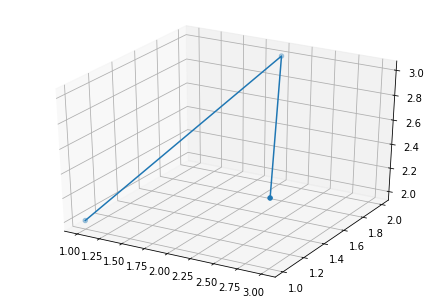

<Figure size 432x288 with 0 Axes>

In [108]:
model = MLP(my_dll_path)
model.init_multicouche_model(np.array([2,1], dtype='float64'))
model.train_multicouche_model_regression(X.flatten(), Y.flatten(), len(Y), 60000.0, 0.01)

print(model.predict_multicouche_model_regression(X[0])[0])

fig = plt.figure()

ax = Axes3D(fig)
ax.scatter(X[:,0],X[:,1],Y)
ax.plot([X[0][0],X[1][0],X[2][0]],
        [X[0][1],X[1][1],X[2][1]],
        zs=[model.predict_multicouche_model_regression(X[0])[0],
            model.predict_multicouche_model_regression(X[1])[0],
            model.predict_multicouche_model_regression(X[2])[0]])
plt.show()
plt.clf()

## RBF

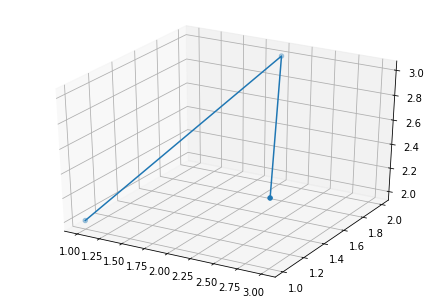

<Figure size 432x288 with 0 Axes>

In [36]:
rbfMod = RBF(my_dll_path)
rbfMod.train_rbf_model(X, Y, 1.0)

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0],X[:,1],Y)
ax.plot([X[0][0],X[1][0],X[2][0]],
        [X[0][1],X[1][1],X[2][1]],
        zs=[rbfMod.predict_rbf_model(np.array(X[0])), 
          rbfMod.predict_rbf_model(np.array(X[1])), 
          rbfMod.predict_rbf_model(np.array(X[2]))])
plt.show()
plt.clf()

### Linear Tricky 3D :
        Linear Model    : OK
        MLP (2, 1)      : OK

In [37]:
X = np.array([
      [1, 1],
      [2, 2],
      [3, 3]
], dtype='float64')
Y = np.array([
      1,
      2,
      3
], dtype='float64')

## MLP

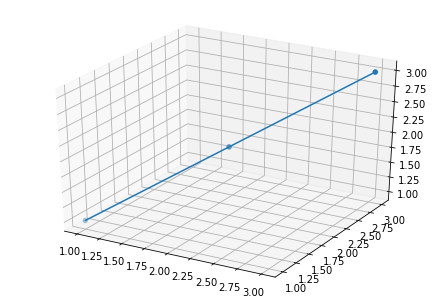

<Figure size 432x288 with 0 Axes>

In [22]:
model = MLP(my_dll_path)
model.init_multicouche_model(np.array([2,1], dtype='float64'))
model.train_multicouche_model_regression(X.flatten(), Y.flatten(), len(Y), 60000.0, 0.1)

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0],X[:,1],Y)
ax.plot([X[0][0],X[1][0],X[2][0]],
        [X[0][1],X[1][1],X[2][1]],
        zs=[model.predict_multicouche_model_regression(X[0])[0],
            model.predict_multicouche_model_regression(X[1])[0],
            model.predict_multicouche_model_regression(X[2])[0]])
plt.show()
plt.clf()

## RBF

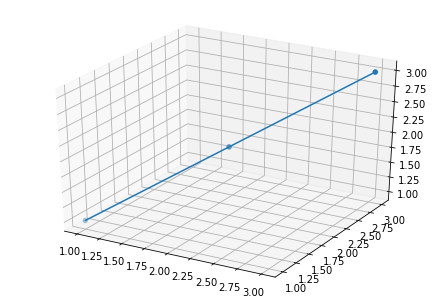

<Figure size 432x288 with 0 Axes>

In [38]:
rbfMod = RBF(my_dll_path)
rbfMod.train_rbf_model(X, Y, 1.0)

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0],X[:,1],Y)
ax.plot([X[0][0],X[1][0],X[2][0]],
        [X[0][1],X[1][1],X[2][1]],
        zs=[rbfMod.predict_rbf_model(np.array(X[0])), 
          rbfMod.predict_rbf_model(np.array(X[1])), 
          rbfMod.predict_rbf_model(np.array(X[2]))])
plt.show()
plt.clf()

### Non Linear Simple 3D :
        Linear Model       : KO
        MLP (2, 2, 1)      : OK

In [39]:
X = np.array([
      [1, 0],
      [0, 1],
      [1, 1],
      [0, 0],
], dtype='float64')
Y = np.array([
      2,
      1,
      -2,
      -1
], dtype='float64')

## MLP

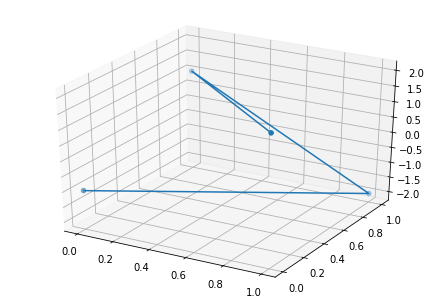

<Figure size 432x288 with 0 Axes>

In [16]:
model = MLP(my_dll_path)
model.init_multicouche_model(np.array([2, 2, 1], dtype='float64'))
model.train_multicouche_model_regression(X.flatten(), Y.flatten(), len(Y), 60000.0, 0.1)

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0],X[:,1],Y)
ax.plot([X[0][0],X[1][0],X[2][0],X[3][0]],
        [X[0][1],X[1][1],X[2][1],X[3][1]],
        zs=[model.predict_multicouche_model_regression(X[0])[0],
            model.predict_multicouche_model_regression(X[1])[0],
            model.predict_multicouche_model_regression(X[2])[0],
            model.predict_multicouche_model_regression(X[3])[0]])
plt.show()
plt.clf()

## RBF

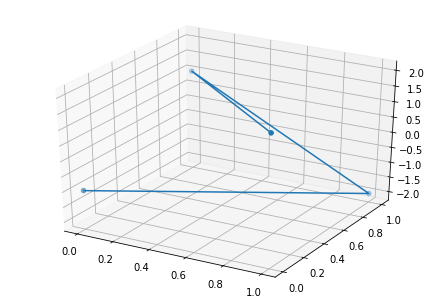

<Figure size 432x288 with 0 Axes>

In [41]:
rbfMod = RBF(my_dll_path)
rbfMod.train_rbf_model(X, Y, 1.0)

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0],X[:,1],Y)
ax.plot([X[0][0],X[1][0],X[2][0],X[3][0]],
        [X[0][1],X[1][1],X[2][1],X[3][1]],
        zs=[rbfMod.predict_rbf_model(np.array(X[0])), 
          rbfMod.predict_rbf_model(np.array(X[1])), 
          rbfMod.predict_rbf_model(np.array(X[2])),
          rbfMod.predict_rbf_model(np.array(X[3]))])
plt.show()
plt.clf()